In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Untitled spreadsheet - heart (1).csv")

# Display the first 5 rows
print("📋 Dataset Preview:")
print(df.head())

# Shape of the dataset
print("\n📐 Dataset Shape:", df.shape)

# Check data types
print("\n📊 Data Types:")
print(df.dtypes)

# Check for missing values
print("\n🔍 Missing Values:")
print(df.isnull().sum())

# Describe the data
print("\n📈 Summary Statistics:")
print(df.describe())


📋 Dataset Preview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

📐 Dataset Shape: (1025, 14)

📊 Data Types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

🔍 Missing Values:
age  

<ipython-input-2-0513f7fa3d6e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set2')


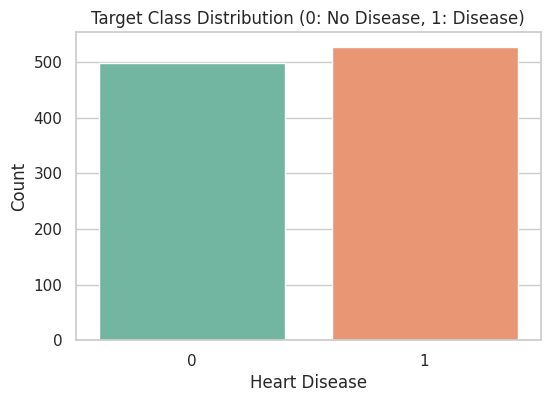

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetic
sns.set(style="whitegrid")

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='target', palette='Set2')
plt.title('Target Class Distribution (0: No Disease, 1: Disease)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

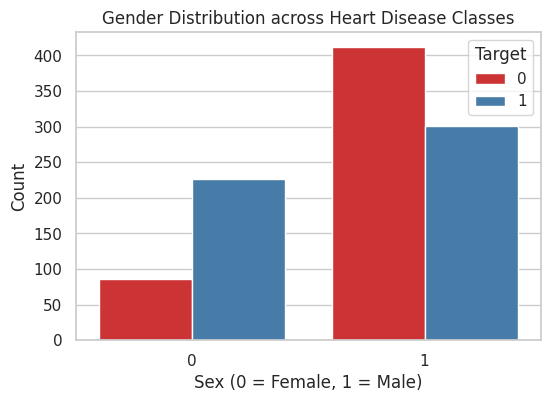

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sex', hue='target', palette='Set1')
plt.title('Gender Distribution across Heart Disease Classes')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()


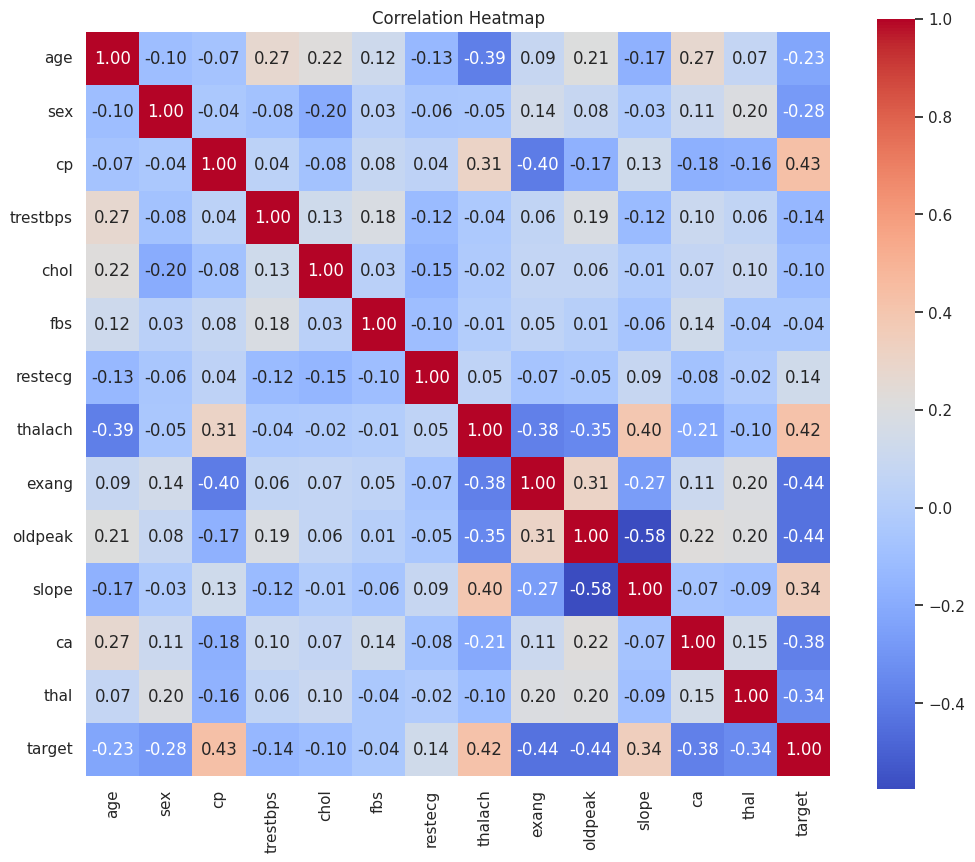

In [12]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Heatmap')
plt.show()

📉 Explained Variance Ratio for Each Component:
PC1: 0.2137
PC2: 0.1197
PC3: 0.0924
PC4: 0.0899
PC5: 0.0769
PC6: 0.0748
PC7: 0.0674
PC8: 0.0591


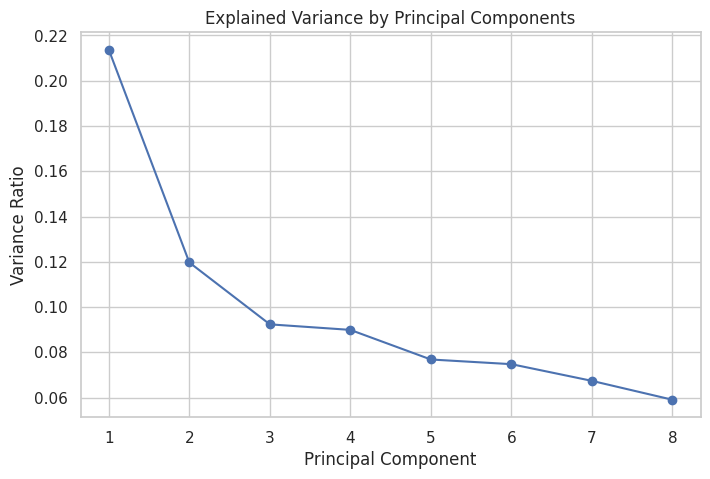

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to extract 8 principal components
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame from PCA results
pca_columns = [f'PC{i+1}' for i in range(8)]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)
df_pca['target'] = y

# Explained variance ratio
print("📉 Explained Variance Ratio for Each Component:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f}")

# Optional: Scree Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, 9), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.grid(True)
plt.show()


In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
models = {
    "Logistic Regression": LogisticRegression(penalty='l2', fit_intercept=True, random_state=1, max_iter=100),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski'),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=300, min_samples_split=2, max_features=None, random_state=42, max_leaf_nodes=None),
    "Random Forest": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=300, min_samples_split=2, max_features='sqrt', bootstrap=True, random_state=42,max_samples=None),
    "Support Vector Machine": SVC(C=1.0, kernel='rbf', gamma='scale', max_iter=1000, random_state=0),
    "Gaussian Naive Bayes": GaussianNB(var_smoothing=1e-08),
    "Multi-layer Perceptron": MLPClassifier(max_iter=300, random_state=1, hidden_layer_sizes=(5, 2), activation='relu', solver='lbfgs', alpha=0.0001, learning_rate='constant', shuffle=True),
    "Extreme Gradient Boosting": xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss',loss='log_loss',min_samples_split=2,min_samples_leaf=1,max_depth=3),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=20, learning_rate=0.1,subsample=1,criterion='friedman_mse',max_depth=2,random_state=1)
}


In [17]:
from sklearn.metrics import classification_report
print("📊 Model Performance WITHOUT PCA:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n🔹 {name}")
    print(f"Accuracy: {acc:.2f} | Precision: {prec:.2f} | Recall: {rec:.2f} | F1 Score: {f1:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=["No Disease", "Disease"]))

📊 Model Performance WITHOUT PCA:

🔹 Logistic Regression
Accuracy: 0.78 | Precision: 0.74 | Recall: 0.87 | F1 Score: 0.80

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.84      0.69      0.76       102
     Disease       0.74      0.87      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205


🔹 K-Nearest Neighbors
Accuracy: 0.90 | Precision: 0.90 | Recall: 0.91 | F1 Score: 0.90

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.91      0.89      0.90       102
     Disease       0.90      0.91      0.90       103

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205


🔹 Decision Tree
Accuracy: 0.99 | Precision: 1.00 | Recall: 0.97 | F1 Score: 0.99

Classi

In [18]:
80# Use PCA-transformed features
X_pca_data = df_pca.drop('target', axis=1)
y_pca = df_pca['target']

# Train-test split for PCA features
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_data, y_pca, test_size=0.2, random_state=42)

# Evaluate all models with PCA
print("📊 Model Performance WITH PCA:\n")
for name, model in models.items():
    model.fit(X_train_pca, y_train_pca)
    y_pred_pca = model.predict(X_test_pca)

    acc = accuracy_score(y_test_pca, y_pred_pca)
    prec = precision_score(y_test_pca, y_pred_pca)
    rec = recall_score(y_test_pca, y_pred_pca)
    f1 = f1_score(y_test_pca, y_pred_pca)

    print(f"🔹 {name}")
    print(f"Accuracy: {acc:.2f} | Precision: {prec:.2f} | Recall: {rec:.2f} | F1 Score: {f1:.2f}\n")
    print("\nClassification Report:")
    print(classification_report(y_test_pca, y_pred_pca, target_names=["No Disease", "Disease"]))

📊 Model Performance WITH PCA:

🔹 Logistic Regression
Accuracy: 0.79 | Precision: 0.76 | Recall: 0.84 | F1 Score: 0.80


Classification Report:
              precision    recall  f1-score   support

  No Disease       0.82      0.74      0.78       102
     Disease       0.76      0.84      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.79      0.79       205
weighted avg       0.79      0.79      0.79       205

🔹 K-Nearest Neighbors
Accuracy: 0.93 | Precision: 0.92 | Recall: 0.93 | F1 Score: 0.93


Classification Report:
              precision    recall  f1-score   support

  No Disease       0.93      0.92      0.93       102
     Disease       0.92      0.93      0.93       103

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205

🔹 Decision Tree
Accuracy: 1.00 | Precision: 1.00 | Recall: 1.00 | F1 Score: 1.00


Classifi

In [19]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Use PCA data
X_pca_data = df_pca.drop('target', axis=1)
y_pca = df_pca['target']

# Stratified 10-Fold Cross-Validation setup
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("📊 10-Fold Cross-Validation Results (Using PCA Features):\n")
for name, model in models.items():
    scores = cross_val_score(model, X_pca_data, y_pca, cv=kfold, scoring='accuracy')
    print(f"🔹 {name}")
    print(f"Mean Accuracy: {scores.mean():.4f} | Std Dev: {scores.std():.4f}\n")


📊 10-Fold Cross-Validation Results (Using PCA Features):

🔹 Logistic Regression
Mean Accuracy: 0.8381 | Std Dev: 0.0244

🔹 K-Nearest Neighbors
Mean Accuracy: 0.9727 | Std Dev: 0.0173

🔹 Decision Tree
Mean Accuracy: 0.9990 | Std Dev: 0.0029

🔹 Random Forest
Mean Accuracy: 0.9990 | Std Dev: 0.0029

🔹 Support Vector Machine
Mean Accuracy: 0.8956 | Std Dev: 0.0286

🔹 Gaussian Naive Bayes
Mean Accuracy: 0.8225 | Std Dev: 0.0274

🔹 Multi-layer Perceptron
Mean Accuracy: 0.8907 | Std Dev: 0.0247

🔹 Extreme Gradient Boosting
Mean Accuracy: 0.9815 | Std Dev: 0.0110

🔹 Gradient Boosting
Mean Accuracy: 0.8536 | Std Dev: 0.0286



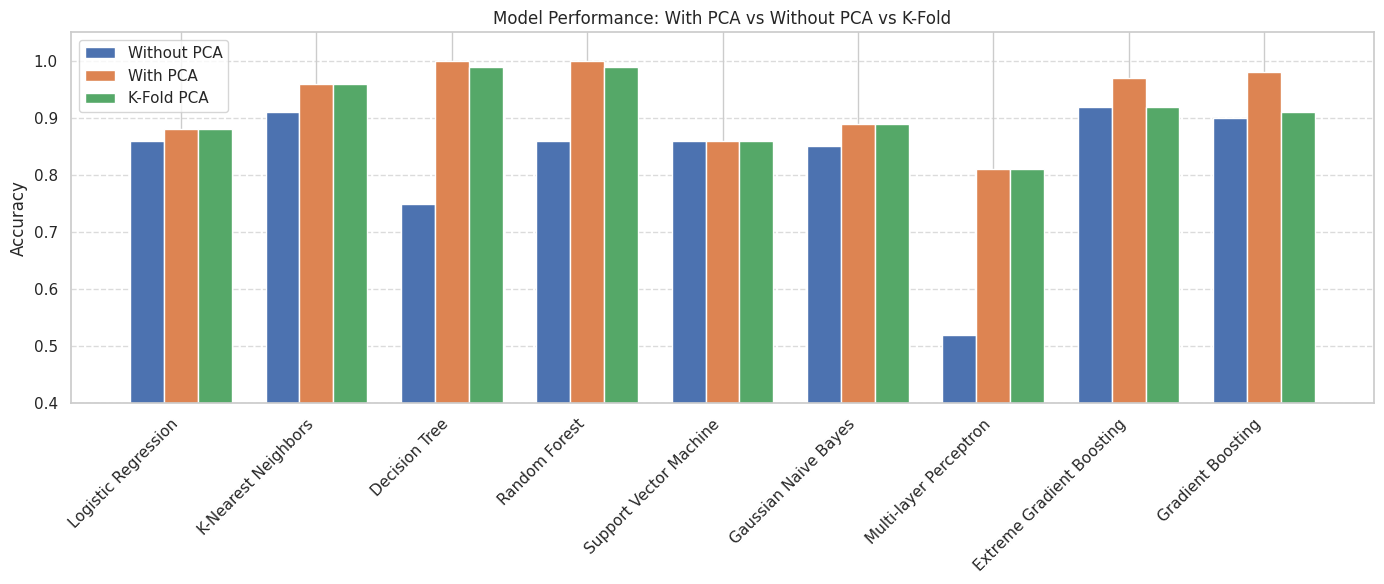

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Sample values (replace with your actual values)
models_list = list(models.keys())
accuracy_without_pca = [0.86, 0.91, 0.75, 0.86, 0.86, 0.85, 0.52, 0.92, 0.90]
accuracy_with_pca =    [0.88, 0.96, 1.00, 1.00, 0.86, 0.89, 0.81, 0.97, 0.98]
kfold_pca =            [0.88, 0.96, 0.99, 0.99, 0.86, 0.89, 0.81, 0.92, 0.91]

x = np.arange(len(models_list))
width = 0.25

plt.figure(figsize=(14, 6))
plt.bar(x - width, accuracy_without_pca, width, label='Without PCA')
plt.bar(x, accuracy_with_pca, width, label='With PCA')
plt.bar(x + width, kfold_pca, width, label='K-Fold PCA')

plt.xticks(x, models_list, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Model Performance: With PCA vs Without PCA vs K-Fold')
plt.ylim(0.4, 1.05)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [21]:
from sklearn.tree import DecisionTreeClassifier

# Assuming you already trained your DT model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train_pca, y_train_pca)

# Access the tree
tree = model.tree_

# Get all thresholds (skip leaf nodes where threshold = -2)
thresholds = tree.threshold[tree.threshold != -2]

print("🔍 All Threshold Values in the Decision Tree:")
print(thresholds)


🔍 All Threshold Values in the Decision Tree:
[ 0.92277706 -0.95043823  1.62436825  0.64195243  1.58120435 -0.14365814
 -0.20736036  0.76914114 -0.79434973  0.37330371 -1.05314314  1.20574099
  0.52002183 -2.29107463 -0.04205801 -1.87620634 -1.95766324  0.94754794
 -0.49459749]


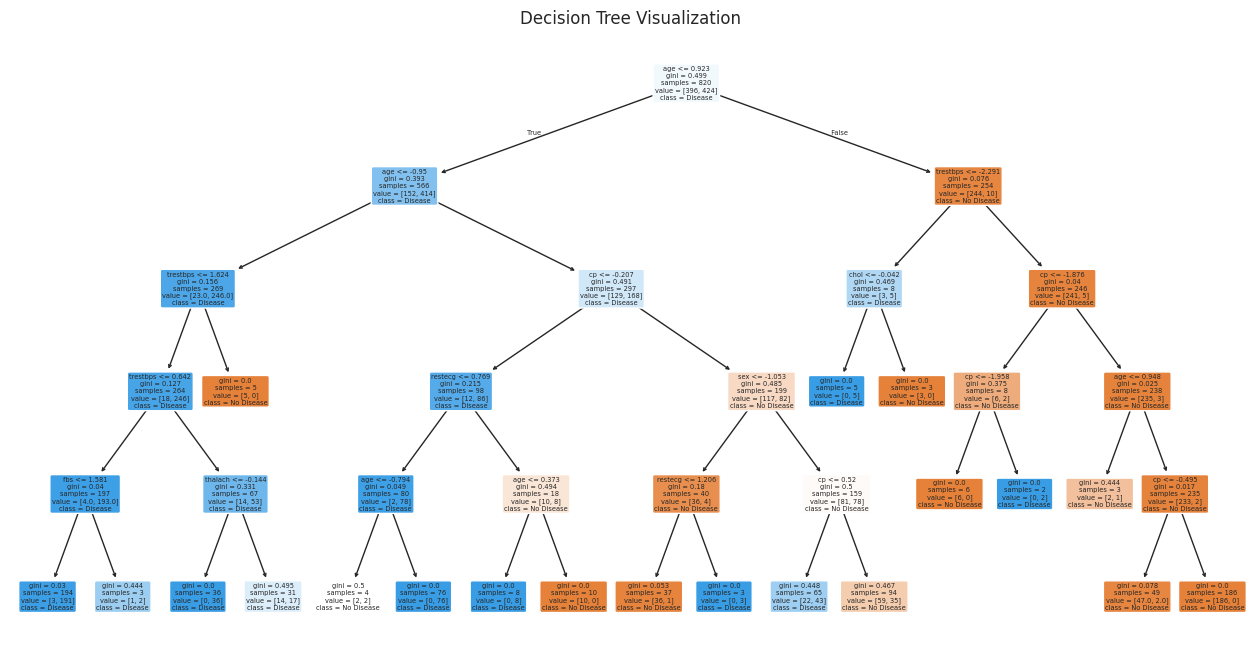

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plot_tree(model, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


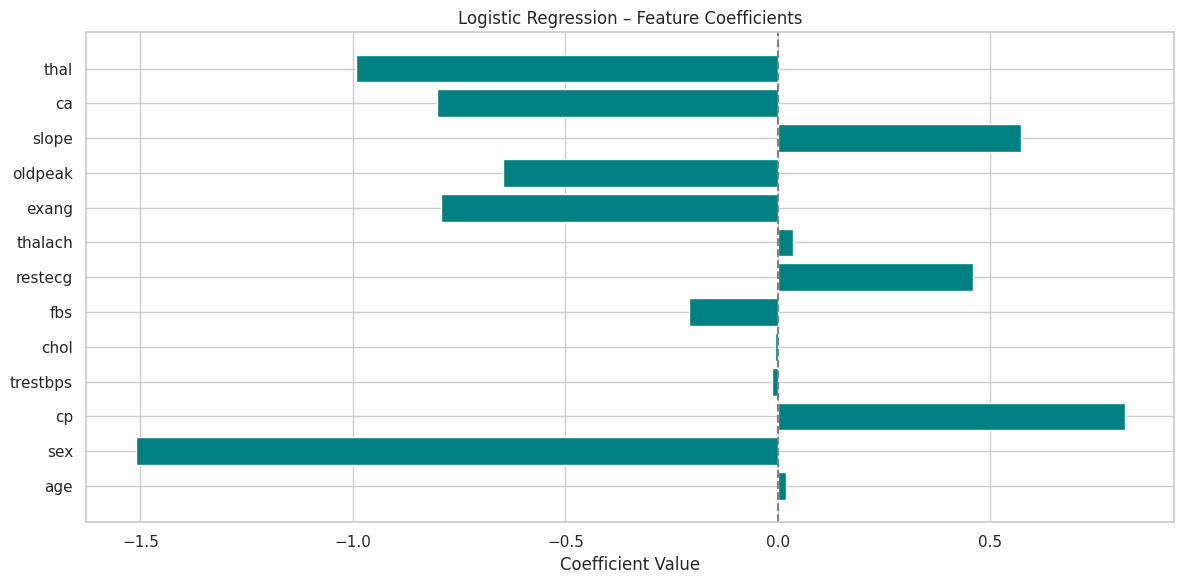

In [23]:
import numpy as np

lr_model = models["Logistic Regression"]
lr_model.fit(X_train, y_train)

coefs = lr_model.coef_[0]
features = X.columns

plt.figure(figsize=(12, 6))
plt.barh(features, coefs, color='teal')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Logistic Regression – Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()


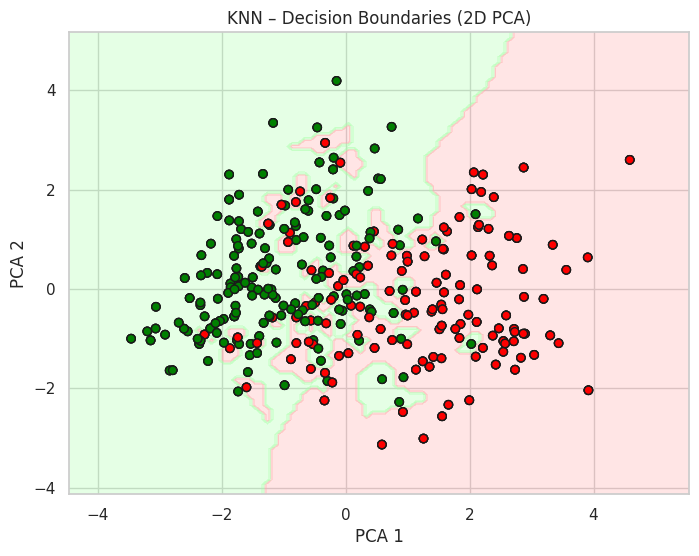

In [24]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Reduce to 2D for plotting
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)  # X_scaled is standardized original features
knn = models["K-Nearest Neighbors"]
knn.fit(X_2d, y)

# Meshgrid for decision regions
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['red', 'green']))
plt.title("KNN – Decision Boundaries (2D PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


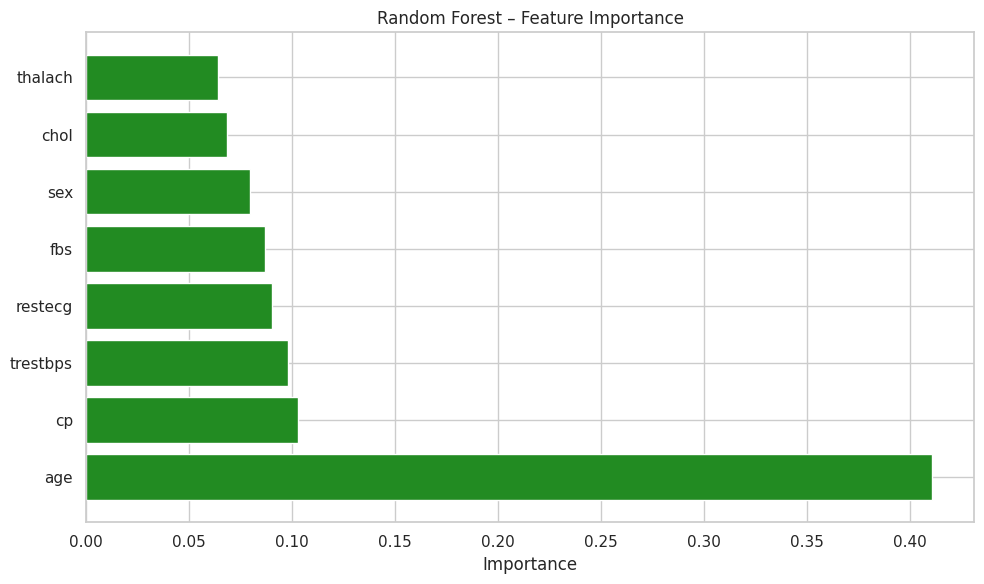

In [25]:
rf = models["Random Forest"]
rf.fit(X_train_pca, y_train_pca)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh([X.columns[i] for i in indices], importances[indices], color='forestgreen')
plt.title("Random Forest – Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


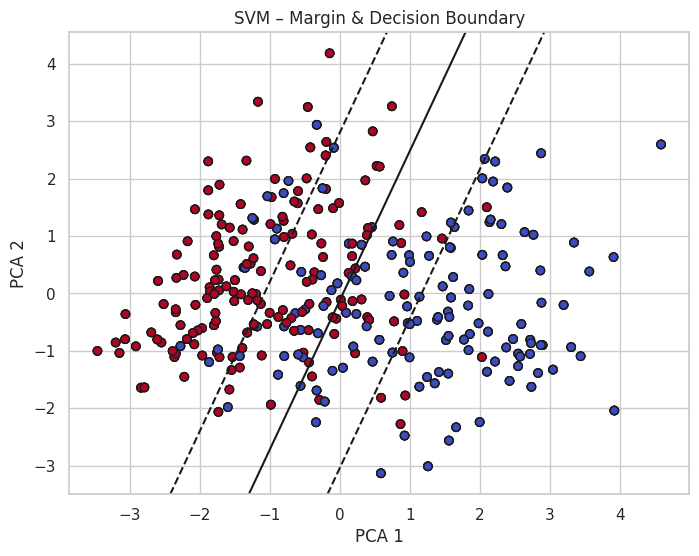

In [26]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1)
svm.fit(X_2d, y)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm', edgecolors='k')
ax = plt.gca()

# Plot decision boundary
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim), np.linspace(*ylim))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.title("SVM – Margin & Decision Boundary")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


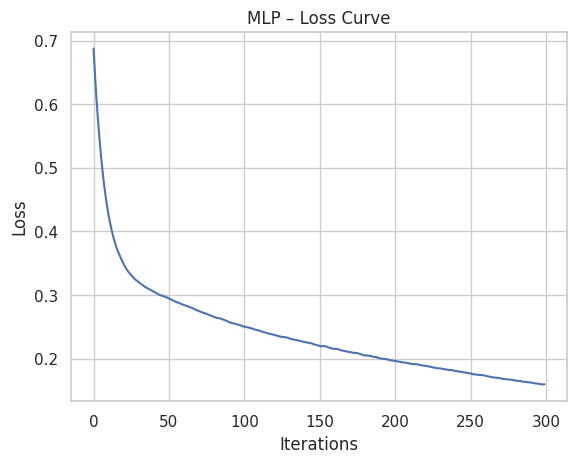

In [27]:
mlp = MLPClassifier(max_iter=300, solver='adam', random_state=1)
mlp.fit(X_train_pca, y_train_pca)

plt.plot(mlp.loss_curve_)
plt.title("MLP – Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


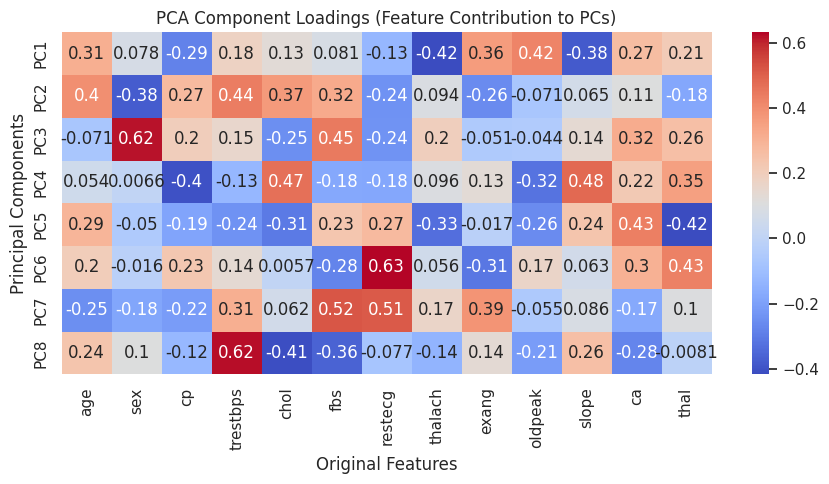

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a DataFrame of PCA components
pca_components = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Heatmap to visualize how strongly each feature contributes to each component
plt.figure(figsize=(10, 6))
sns.heatmap(pca_components, cmap='coolwarm', annot=True)
plt.title("PCA Component Loadings (Feature Contribution to PCs)")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.tight_layout()
plt.show()
